In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice

# Loading and cleaning data

We decided to reduce our dataset and begin it in 1918 due to several missing medals (gold, silver or bronze). Moreover, we kept in our dataset only columns that are essentials for us such as :
1. Year
2. Discipline
3. Country
4. Event
5. Medal


In [2]:
df_sum = pd.read_csv('data/summer.csv')
df_sum_reduced = df_sum.drop(["City", "Sport", "Gender", "Athlete"],  axis=1)
df_sum_reduced = df_sum_reduced[df_sum_reduced["Year"] >= 1918]

df_sum_reduced

,Year,Discipline,Country,Event,Medal
1274,1920,Diving,DEN,10M Platform,Gold
1275,1920,Diving,GBR,10M Platform,Silver
1276,1920,Diving,SWE,10M Platform,Silver
1277,1920,Diving,SWE,Plain High Diving,Bronze
1278,1920,Diving,SWE,Plain High Diving,Gold
...,...,...,...,...,...
16797,2020,Wrestling,UKR,"Light-Heavyweight, Freestyle",Bronze
16798,2020,Wrestling,GER,"Heavyweight, Freestyle",Gold
16799,2020,Wrestling,USA,"Heavyweight, Freestyle",Silver
16800,2020,Wrestling,CHN,"Heavyweight, Freestyle",Bronze


In [3]:
#Check if there is NA values to remove
print("Is there Na values in our dataframe ?", df_sum_reduced.isnull().values.any())

Is there Na values in our dataframe ? False


In [4]:
df_sum_reduced[df_sum_reduced["Country"] == "EUN"].head(100)

,Year,Discipline,Country,Event,Medal
9286,1992,Diving,EUN,3M Springboard,Bronze
9287,1992,Diving,EUN,10M Platform,Silver
9288,1992,Diving,EUN,3M Springboard,Silver
9313,1992,Swimming,EUN,100M Freestyle,Gold
9314,1992,Swimming,EUN,200M Backstroke,Silver
...,...,...,...,...,...
10026,1992,Weightlifting,EUN,"90 - 100KG, Total (First-Heavyweight)",Silver
10043,1992,Wrestling Free.,EUN,- 48KG (Light-Flyweight),Bronze
10044,1992,Wrestling Free.,EUN,100 - 130KG (Super Heavyweight),Bronze
10045,1992,Wrestling Free.,EUN,52 - 57KG (Bantamweight),Silver


## Problems with countries

In [5]:
df_sum_reduced["Country"].value_counts().head(15)

USA    2235
URS    1008
GBR     701
CHN     633
FRA     604
ITA     602
GER     586
AUS     538
JPN     493
HUN     478
RUS     444
SWE     410
GDR     409
NED     318
ROU     307
Name: Country, dtype: int64

As we can see here, there is a problem in the medals's count due to URSS. This union no longer exists since 1991. There are also others "countries" which are in reality a regroupment of atheltes who represents the olympic flag. We have :
- ROC (Russian Olympic Committee)
- IOA (Independant Olympics Athletes)
- IOP (Independant Olympic Participants)
- EUN (Unified Team for soviet athletes in 1992 summer and winter olympics)


In [23]:
countries = df_sum_reduced["Country"].unique()
countries.sort()

In [7]:
print("Number of medals won by ROC :", df_sum_reduced[df_sum_reduced["Country"] == "ROC"].shape[0])
print("Number of medals won by IOA :", df_sum_reduced[df_sum_reduced["Country"] == "IOA"].shape[0])
print("Number of medals won by IOP :", df_sum_reduced[df_sum_reduced["Country"] == "IOP"].shape[0])
print("Number of medals won by EUN :", df_sum_reduced[df_sum_reduced["Country"] == "EUN"].shape[0])

Number of medals won by ROC : 71
Number of medals won by IOA : 2
Number of medals won by IOP : 3
Number of medals won by EUN : 112


# Countries and Medals

We decided to show two histograms to represent visually countries and their respectively medals's number. To clarify, the first TOP 50 countries and the other countries are separated

In [28]:
countries_medals = df_sum_reduced["Country"].value_counts()
top = len(countries) // 3
tail = len(countries) - top
countries_medals_top = countries_medals.head(top)
countries_medals_tail = countries_medals.tail(tail)
sns.set(font_scale=1.4)

<AxesSubplot:title={'center':"TOP 50 countries with their respective medals's number"}>

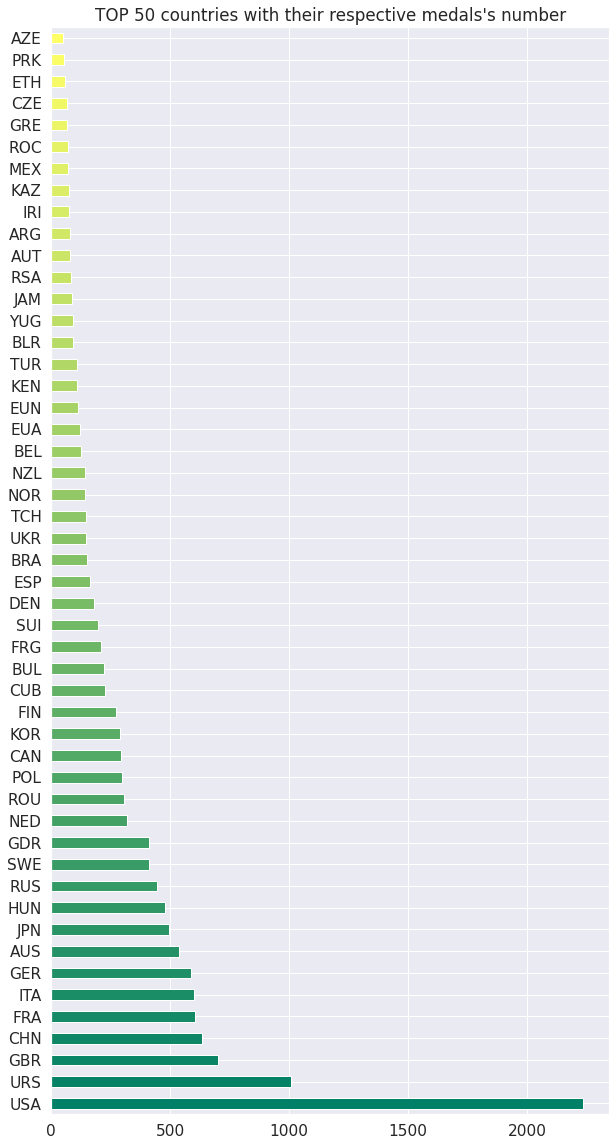

In [60]:
cmap = plt.cm.get_cmap('summer')
colors = plt.cm.summer(np.linspace(0,1,len(countries_medals_top)))
countries_medals_top.plot(kind='barh', figsize=(10, 20), title= 'TOP 50 countries with their respective medals\'s number', color=colors)

<AxesSubplot:title={'center':'Other countries out of TOP 50'}>

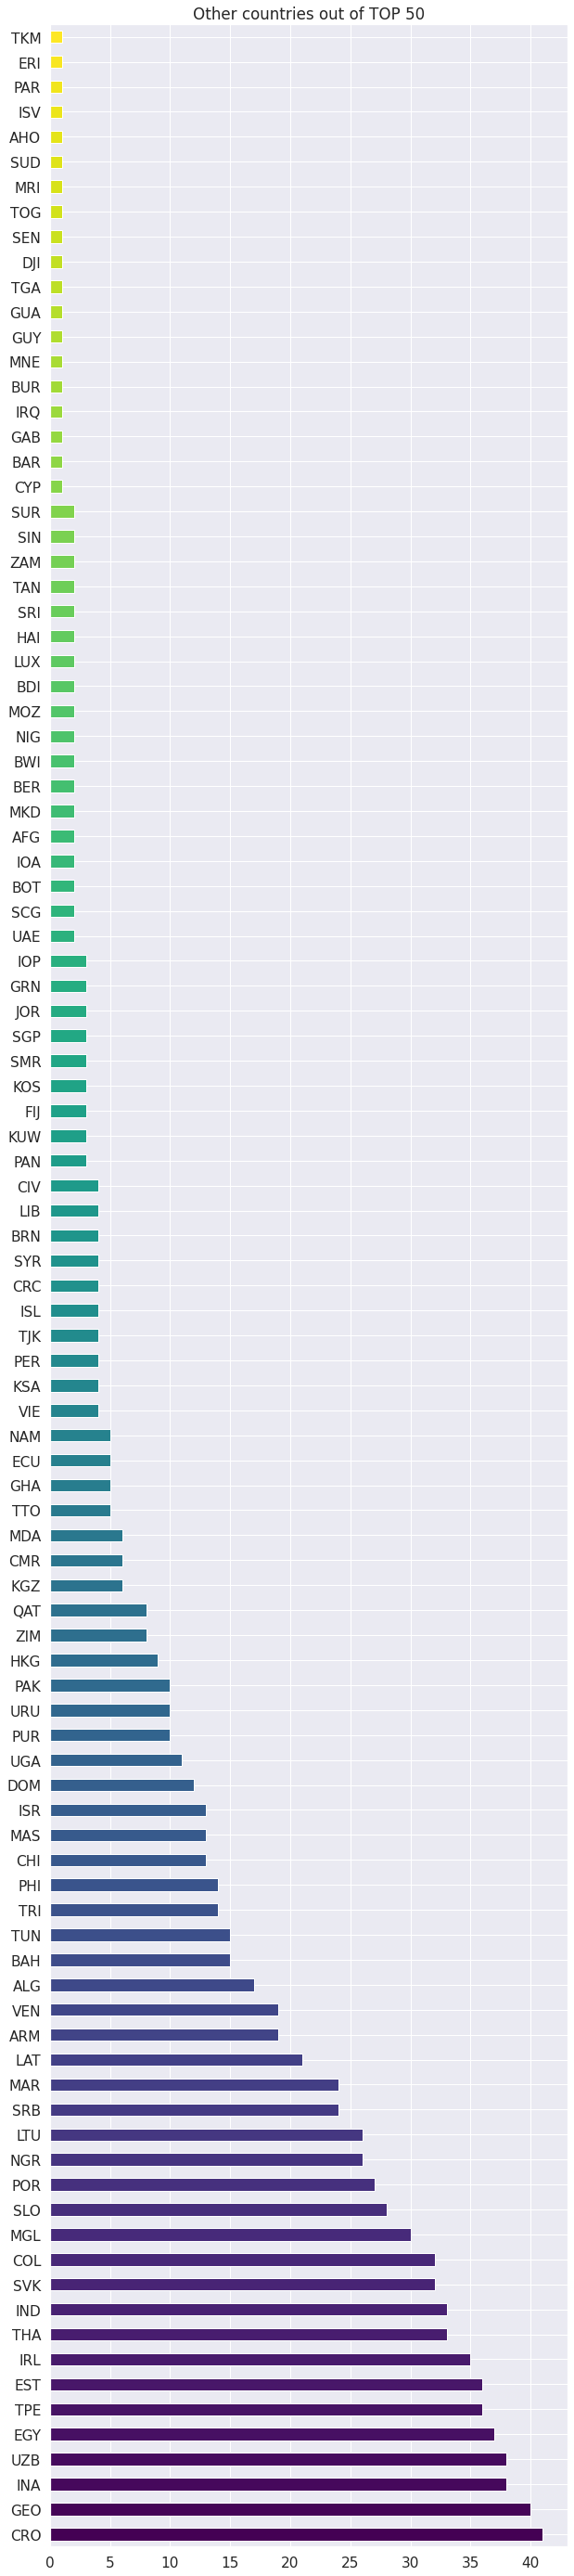

In [56]:
cmap = plt.cm.get_cmap('viridis')
colors = plt.cm.viridis(np.linspace(0,1,len(countries_medals_tail)))
countries_medals_tail.plot(kind='barh', figsize=(10, 50), title="Other countries out of TOP 50", color=colors)